<div>
  <h1>B2B Sales Dataset - Exploratory Data Analysis (EDA)**</h1>
</div>

---
Data được lấy từ Kaggle: https://www.kaggle.com/datasets/kyanyoga/sample-sales-data/data

**Mục tiêu:**  
- Làm sạch và khám phá dữ liệu.  
- Tìm hiểu doanh thu theo sản phẩm, khách hàng, thời gian.  
- Chuẩn bị dữ liệu cho Data Warehouse (Fact/Dimension) và Power BI Dashboard.  


# 1. Import Libraries and Load Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/B2B Sales Data/sales_data_sample.csv"
df = pd.read_csv(file_path, encoding='latin1', keep_default_na=False, na_values=[""])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Overview


In [ ]:
df.shape

(2823, 25)

In [ ]:
df.head(100)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10285,27,100.00,8,5438.07,8/27/2004 0:00,Shipped,3,8,2004,...,39323 Spinnaker Dr.,NaN,Cambridge,MA,51247,USA,NA,Hernandez,Marta,Medium
96,10299,29,100.00,11,6683.34,9/30/2004 0:00,Shipped,3,9,2004,...,Keskuskatu 45,NaN,Helsinki,NaN,21240,Finland,EMEA,Karttunen,Matti,Medium
97,10308,20,100.00,1,4570.40,10/15/2004 0:00,Shipped,4,10,2004,...,3758 North Pendale Street,NaN,White Plains,NY,24067,USA,NA,Frick,Steve,Medium
98,10318,37,100.00,3,7667.14,11/2/2004 0:00,Shipped,4,11,2004,...,7586 Pompton St.,NaN,Allentown,PA,70267,USA,NA,Yu,Kyung,Large


In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


**Bảng dữ liệu gốc có các cột liên quan đến đơn hàng:**
- ORDERNUMBER: Mã đơn hàng (ID duy nhất cho mỗi order). Một đơn hàng có thể gồm nhiều dòng sản phẩm.
- QUANTITYORDERED: Số lượng sản phẩm được đặt trong dòng đơn hàng đó.
- PRICEEACH: Giá của một đơn vị sản phẩm trong đơn hàng (unit price).
- ORDERLINENUMBER: Số thứ tự dòng sản phẩm trong đơn hàng. Ví dụ một order có nhiều sản phẩm thì dòng 1,2,3…
- SALES: Doanh thu của dòng sản phẩm đó = QUANTITYORDERED * PRICEEACH.
- ORDERDATE: Ngày đặt hàng.
- STATUS: Trạng thái đơn hàng.
- QTR_ID: Quý trong năm (1,2,3,4).
- MONTH_ID: Tháng trong năm (1–12).
- YEAR_ID: Năm đặt hàng (2003, 2004,…).
- PRODUCTLINE: Nhóm sản phẩm (ví dụ: Motorcycles, Classic Cars, Trains…).
- MSRP: Giá bán lẻ đề xuất (Manufacturer’s Suggested Retail Price).
- PRODUCTCODE: Mã sản phẩm (ID duy nhất cho từng sản phẩm).
- CUSTOMERNAME: Tên công ty/khách hàng đặt hàng.
- PHONE: Số điện thoại liên hệ của khách hàng.
- ADDRESSLINE1: Địa chỉ chính của khách hàng.
- ADDRESSLINE2: Địa chỉ phụ của khách hàng.
- CITY: Thành phố của khách hàng.
- STATE: Bang (chỉ áp dụng cho một số quốc gia như Mỹ).
- POSTALCODE: Mã bưu điện (Zip code).
- COUNTRY: Quốc gia khách hàng.
- TERRITORY: Khu vực thị trường
- CONTACTLASTNAME: Họ của người liên hệ (contact person) trong công ty khách hàng.
- CONTACTFIRSTNAME: Tên của người liên hệ.
- DEALSIZE: Quy mô đơn hàng: phân loại thành Small, Medium, Large. Thường dựa trên tổng giá trị đơn hàng (SALES).

# 3. Missing value

In [ ]:
# 1. Kiểm tra tổng số missing values
print("Tổng số missing values:")
print(df.isnull().sum())

Tổng số missing values:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY              0
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [ ]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Tỉ lệ missing values:")
print(missing_percent)

Tỉ lệ missing values:
ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY            0.000000
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64


Thấy tỉ lệ missing value của ADDRESSLINE2 cao nên sẽ xóa bỏ cột đó.

In [ ]:
# Xoá cột ADDRESSLINE2
df = df.drop(columns=['ADDRESSLINE2'])

# Đổi tên cột ADDRESSLINE1 thành ADDRESS
df = df.rename(columns={'ADDRESSLINE1': 'ADDRESS'})

In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESS', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY',
       'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

# 4. Analyzing Sale Price

In [ ]:
df['SALES'].describe()

,SALES
count,2823.000000
mean,3553.889072
std,1841.865106
min,482.130000
25%,2203.430000
50%,3184.800000
75%,4508.000000
max,14082.800000


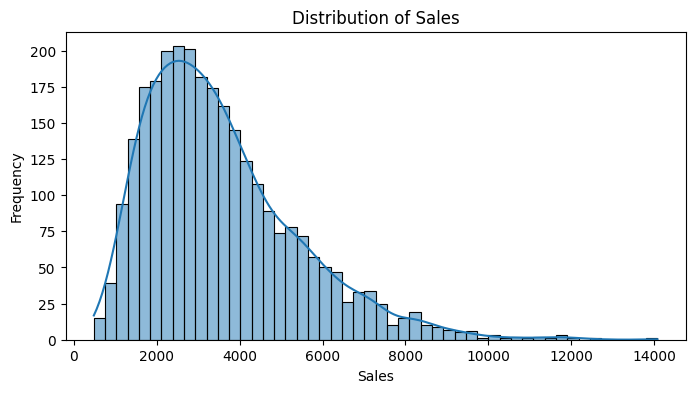

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df['SALES'], bins=50, kde=True)
plt.title('Phân phối doanh số')
plt.xlabel('Doanh thu')
plt.ylabel('Tần suất')
plt.show()


Một vài lưu ý khi quan sát phân phối:
- Có độ lệch dương đáng kể.
- Hầu hết khách hàng mua ở mức giá trung bình/thấp.

# 5. Mối quan hệ giữa các biến số

Với numerical variables:

QUANTITYORDERED: Số lượng sản phẩm được đặt trong đơn hàng đó

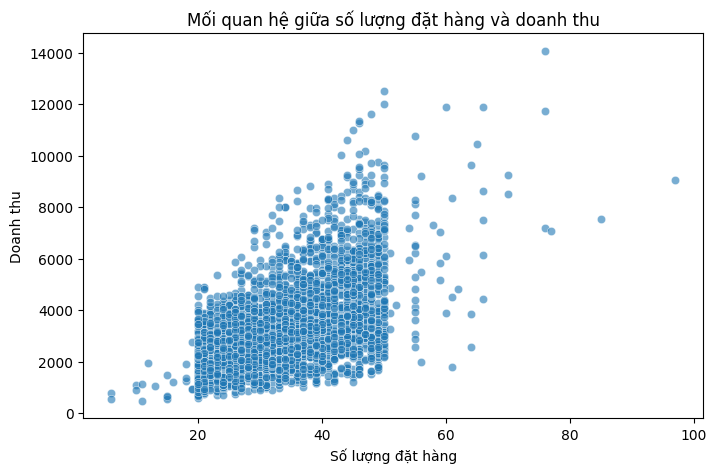

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='QUANTITYORDERED', y='SALES', data=df, alpha=0.6)

plt.title('Mối quan hệ giữa số lượng đặt hàng và doanh thu')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('SALES')
plt.show()

Sales có xu hướng tăng khi Quantity tăng, nhưng không rõ rệt tuyến tính -> điều này cho thấy giá bán đơn vị (PriceEach) ảnh hưởng lớn.

PRICEEACH: Giá của một đơn vị sản phẩm trong đơn hàng (unit price).

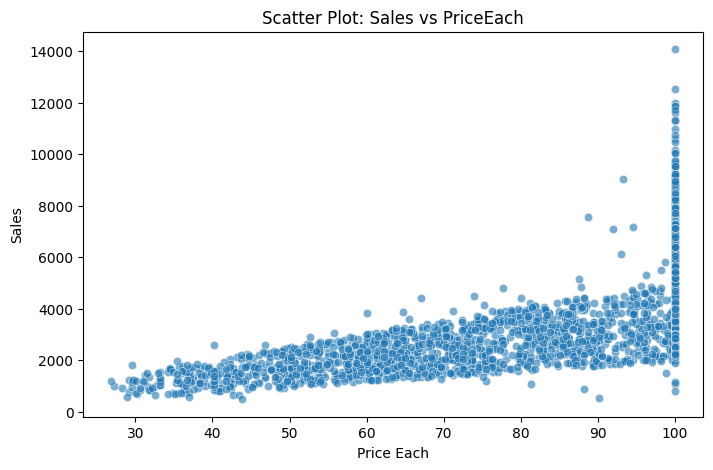

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='PRICEEACH', y='SALES', data=df, alpha=0.6)
plt.title('Scatter Plot: Sales vs PriceEach')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()

Với categorical variables:

PRODUCTLINE: Nhóm sản phẩm (ví dụ: Motorcycles, Classic Cars, Trains…).

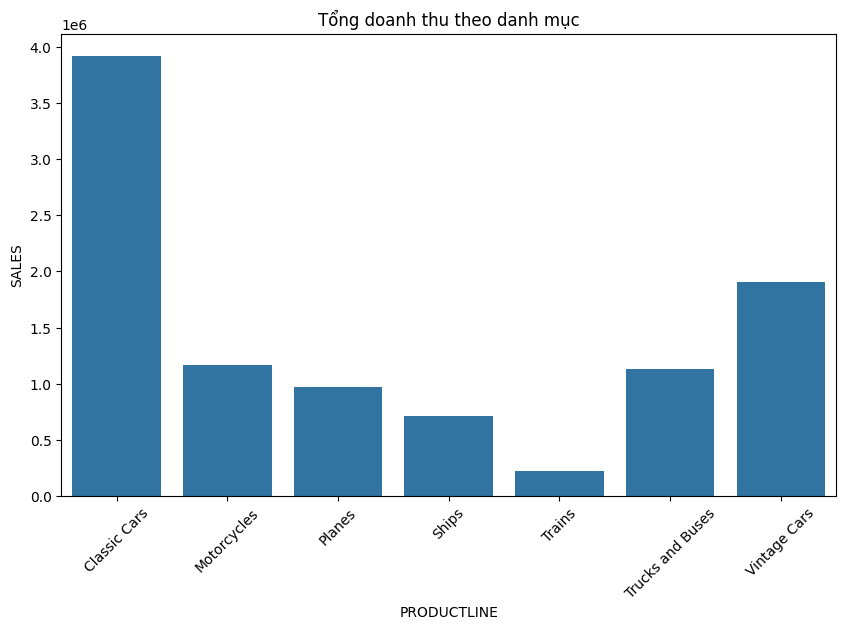

In [ ]:
plt.figure(figsize=(10,6))
sales_by_productline = df.groupby("PRODUCTLINE")["SALES"].sum().reset_index()
sns.barplot(x="PRODUCTLINE", y="SALES", data=sales_by_productline)
plt.title("Tổng doanh thu theo danh mục")
plt.xticks(rotation=45)
plt.show()

- Doanh thu phân bổ khá không đồng đều giữa các dòng sản phẩm.
- Có sự chênh lệch lớn giữa nhóm dẫn đầu (Classic Cars, Vintage Cars) và nhóm còn lại.
- Classic Cars nổi bật nhất với doanh thu ~4.0M, chiếm tỷ trọng lớn nhất toàn bộ dataset. Đây có thể là dòng sản phẩm "flagship" hoặc bán chạy nhất.
- Trains có doanh thu thấp nhất (~0.2M), chiếm tỷ lệ rất nhỏ, có thể do ít đơn hàng hoặc không phải mặt hàng chủ lực.
-> "Classic Cars" là dòng sản phẩm mang lại doanh thu chủ lực

COUNTRY: Quốc gia khách hàng.

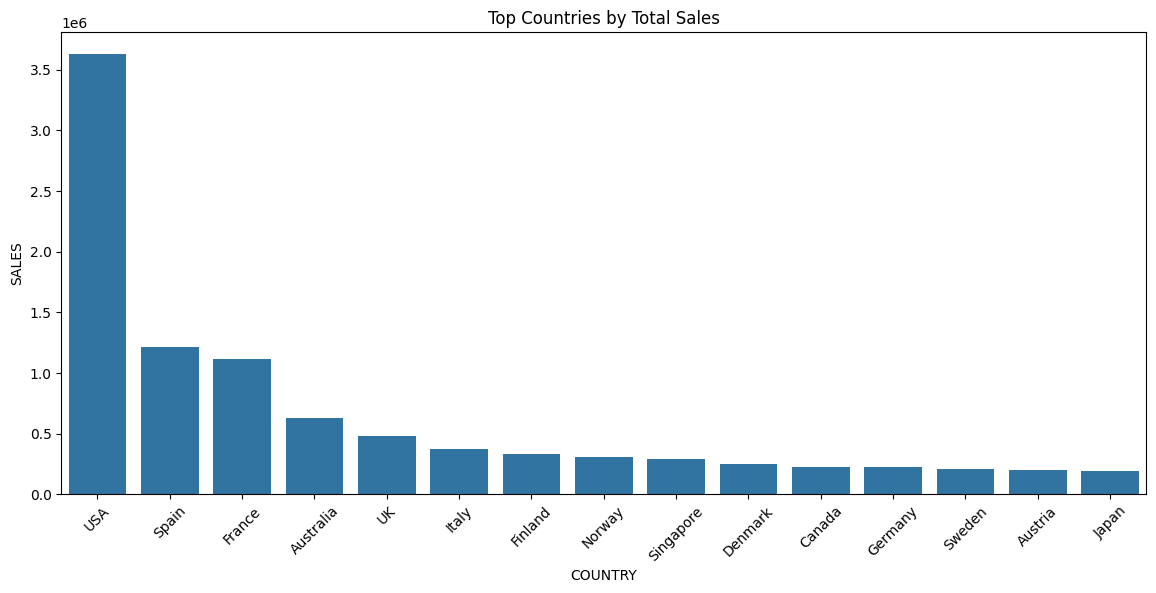

In [ ]:
plt.figure(figsize=(14,6))
sales_by_country = df.groupby("COUNTRY")["SALES"].sum().reset_index().sort_values("SALES", ascending=False)
sns.barplot(x="COUNTRY", y="SALES", data=sales_by_country.head(15))  # lấy top 15 quốc gia
plt.title("Top quốc gia theo doanh thu")
plt.xticks(rotation=45)
plt.show()

Doanh thu chủ yếu đến từ thị trường Mỹ, chiếm phần lớn trong tổng doanh thu toàn cầu.

# 6. Cách tiếp cận khách quan hơn

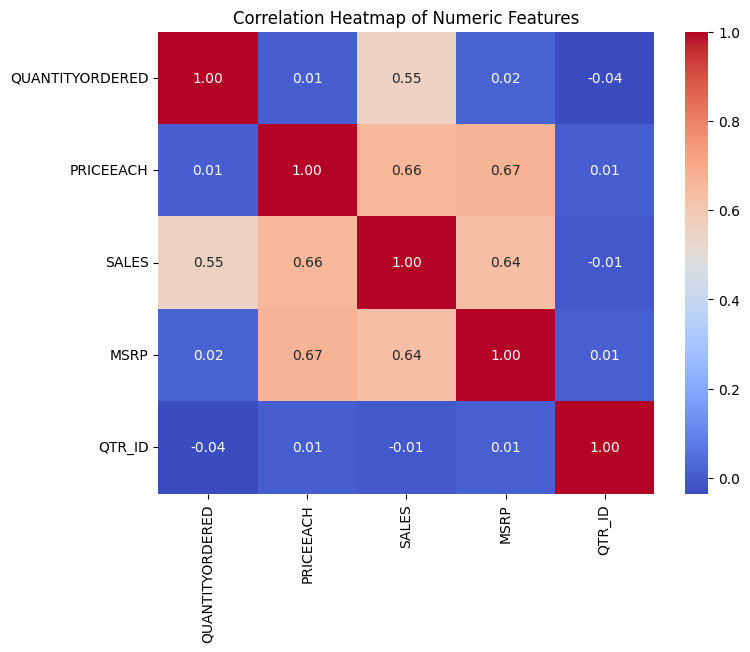

In [ ]:
numeric_cols = ["QUANTITYORDERED", "PRICEEACH", "SALES", "MSRP", "QTR_ID"]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Nhận xét:
- PRICEEACH <-> SALES (0.66): giá bán có đơn vị tương quan cao nhất với doanh thu. Nghĩa là sản phẩm có giá trị cao thì thường doanh thu cũng sẽ cao.</br>
-> Đẩy mạnh marketing cho sản phẩm cao cấp (vì tác động mạnh đến doanh thu).

# 7. Data Cleaning & Modeling Prep

Loại bỏ các cột dư thừa và rename columns

In [ ]:
# Rename columns
df.rename(columns={
    "ORDERNUMBER": "OrderID",
    "QUANTITYORDERED": "QuantityOrdered",
    "PRICEEACH": "PriceEach",
    "SALES": "Sales",
    "ORDERDATE": "OrderDate",
    "STATUS": "Status",
    "PRODUCTLINE": "ProductCategory",
    "MSRP": "MSRP",
    "PRODUCTCODE": "ProductID",
    "CUSTOMERNAME": "CustomerName",
    "PHONE": "Phone",
    "ADDRESS": "Address",
    "CITY": "City",
    "STATE": "State",
    "POSTALCODE": "PostalCode",
    "COUNTRY": "Country",
    "TERRITORY": "Territory",
    "CONTACTLASTNAME": "ContactLastName",
    "CONTACTFIRSTNAME": "ContactFirstName",
}, inplace=True)

#Drop columns
drop_cols = ["QTR_ID", "MONTH_ID", "YEAR_ID", "DEALSIZE", "ORDERLINENUMBER"]
df.drop(columns=drop_cols, inplace=True)

In [ ]:
df.shape

(2823, 19)

In [ ]:
df.columns

Index(['OrderID', 'QuantityOrdered', 'PriceEach', 'Sales', 'OrderDate',
       'Status', 'ProductCategory', 'MSRP', 'ProductID', 'CustomerName',
       'Phone', 'ADDRESS', 'City', 'State', 'PostalCode', 'Country',
       'Territory', 'ContactLastName', 'ContactFirstName'],
      dtype='object')

In [ ]:
# Chuẩn hóa fact và dimension tables
# Fact table
Sales = df[["OrderID", "OrderDate", "ProductID", "CustomerName", "QuantityOrdered", "PriceEach", "Sales"]]

# Dim tables
Product = df[["ProductID", "ProductCategory", "MSRP"]].drop_duplicates().reset_index(drop=True)
Customer = df[["CustomerName", "ContactLastName", "ContactFirstName", "Phone",
                   "Address", "City", "State", "PostalCode", "Country", "Territory"]].drop_duplicates().reset_index(drop=True)
Date = df[["OrderDate"]].drop_duplicates().reset_index(drop=True)

(252, 1)

In [ ]:
print("Fact Sales Shape:", Sales.shape)
print("Dim Product Shape:", Product.shape)
print("Dim Customer Shape:",Customer.shape)
print("Dim Date Shape:", Date.shape)

Fact Sales Shape: (2823, 7)
Dim Product Shape: (109, 3)
Dim Customer Shape: (92, 10)
Dim Date Shape: (252, 1)


In [ ]:
#Lưu ra CSV
Sales.to_csv("/content/drive/MyDrive/B2B Sales Data/Sales.csv", index=False)
Product.to_csv("/content/drive/MyDrive/B2B Sales Data/Product.csv", index=False)
Customer.to_csv("/content/drive/MyDrive/B2B Sales Data/Customer.csv", index=False)
Date.to_csv("/content/drive/MyDrive/B2B Sales Data/Date.csv", index=False)